In [30]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib as mpl

chfont = fm.FontProperties(fname=r'C:\Users\yuy\Downloads\msyh.ttf') 
myfont = mpl.font_manager.FontProperties(fname = r'C:\Users\yuy\Downloads\msyh.ttc', size = 8)

FILE = r'E:\A_Workspace\Python\数据可视化\cleaned_new.csv'
df = pd.read_csv(FILE)

[[670, '北京'], [278, '上海'], [253, '深圳'], [101, '广州'], [96, '成都'], [92, '杭州'], [44, '武汉'], [27, '南京'], [21, '西安'], [20, '厦门'], [16, '无锡'], [15, '郑州'], [13, '苏州'], [12, '长沙'], [12, '重庆'], [9, '天津'], [9, '大连'], [6, '珠海'], [5, '合肥'], [3, '廊坊'], [3, '南宁'], [2, '青岛'], [2, '贵阳'], [2, '济南'], [2, '宁波'], [2, '哈尔滨'], [2, '东莞'], [1, '长春'], [1, '福州'], [1, '石家庄'], [1, '清远'], [1, '沈阳'], [1, '徐州'], [1, '威海'], [1, '太原']]


<IPython.core.display.Javascript object>


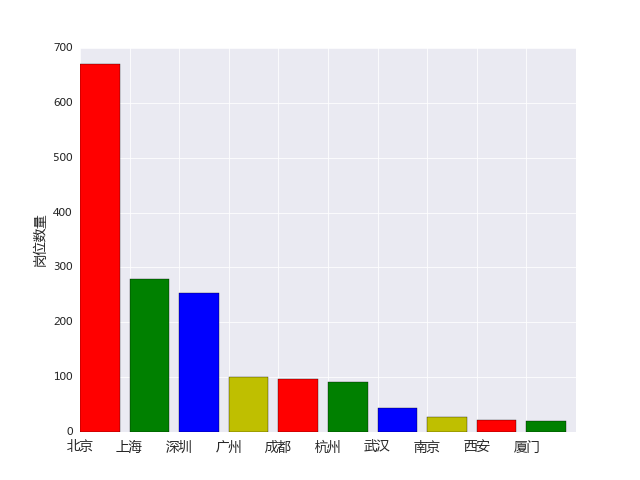

In [11]:
#分析一下该岗位的城市分布
%matplotlib notebook
dic = {}
data = df['city']
for i in data:
    if i in dic.keys():
        dic[i] += 1
    else:
        dic[i] = 1
#---------按dic的value倒序排序-------        
items = dic.items()
backitems=[[v[1],v[0]] for v in items]
backitems.sort(reverse = True) 
#--------排序结束，返回list类型的backitems-----
print(backitems)
items = [[v[1], v[0]] for v in backitems][:10]#取岗位数最多的10个城市
x_val = [v[1] for v in items]
x_tic = [v[0] for v in items]
#print(x_val)
#print(x_tic, x_val)
#plt.rcParams['font.sans-serif'] = ['微软雅黑']
index = list(range(10))
plt.bar(index, x_val, color = 'rgby')
plt.ylabel("岗位数量", fontproperties = chfont) #y轴标签
plt.xticks(index, x_tic, fontproperties = chfont)#x轴刻度
plt.grid(alpha = 0.8)

#从图中可以看出：
#1.python岗位最多还是集中在北京（看了北京的技术资源优势还是厉害）
#2.上海、深圳作为第二梯队，岗位需求均不足300
#3.光州、成都、杭州作为第三梯队，岗位需求在100左右
#4.武汉、南京、西安、厦门也有几十个岗位需求，但是总体不多
#5.其他城市需求更少，从全国范围来看，多数城市没有这方面的人才需求

<IPython.core.display.Javascript object>


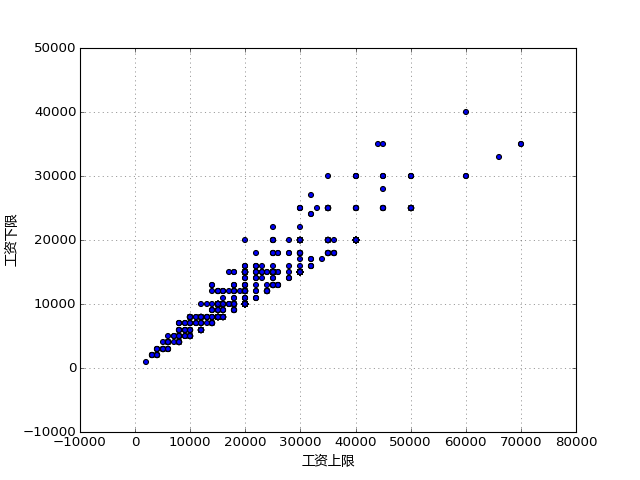

In [3]:
fig2, ax2 = plt.subplots()
ax2.scatter(df['salary_max'], df['salary_min'])
ax2.set_xlabel('工资上限', fontproperties = chfont)
ax2.set_ylabel('工资下限', fontproperties = chfont)
ax2.grid(alpha = 0.7)
plt.show()
#对每个招聘信息的最低工资和最高工资的比例关系做了一个散点图，从图中可以看出：
#1.最低工资和最高工资的比例关系基本呈线性分布，而且是高于1:1的
#2.最低工资20000以上、最高工资30000以上的岗位相对较少，薪资待遇10000以下的岗位也是大量存在的

<IPython.core.display.Javascript object>


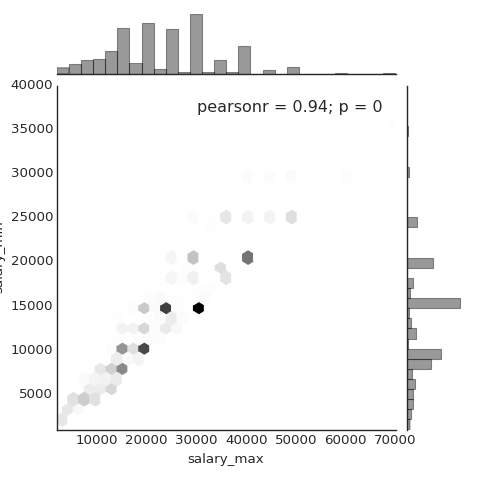

In [4]:
with sns.axes_style("white"):
    sns.jointplot(x=df['salary_max'], y=df['salary_min'], kind="hex", color="k")

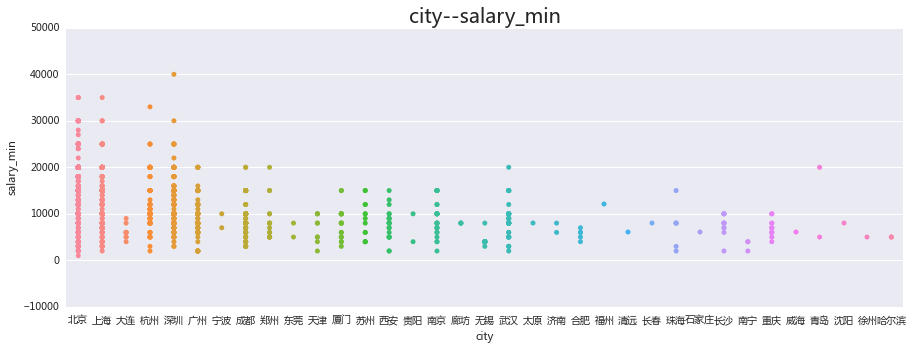

In [17]:
%matplotlib inline
dims = (15, 5)
fig, ax = plt.subplots(figsize = dims)
sns.stripplot(x="city", y="salary_min", data=df)
myfont = mpl.font_manager.FontProperties(fname = r'C:\Users\yuy\Downloads\msyh.ttc', size = 8)
sns.set(font = myfont.get_name())
ax.set_title('city--salary_min', fontsize = 20)


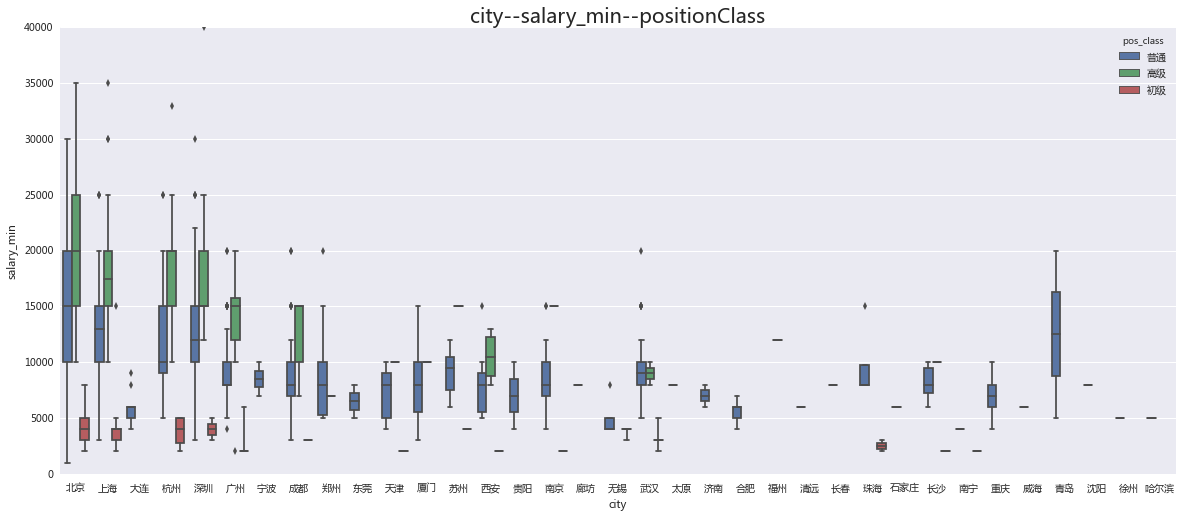

In [36]:
%matplotlib inline
dims = (20, 8)
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(x="city", y="salary_min", hue='pos_class', data=df)
#sns.violinplot(x="city", y="salary_min", hue='pos_class', data=df)
myfont = mpl.font_manager.FontProperties(fname = r'C:\Users\yuy\Downloads\msyh.ttc', size = 8)
sns.set(font = myfont.get_name())
ax.set_title('city--salary_min--positionClass', fontsize = 20)
#利用盒图对底薪-城市-岗位之间的关系进行展示
#1.初级岗位、普通岗位、高级岗位的待遇总体来说规律还是很明显的
#2.可能在对岗位分类的时候存在误差，导致不同类别的岗位薪资出现了交叉
#3.确实存在一些普通岗位的薪资高于高级岗位的情况，比如武汉市两个高级岗位，底薪都不超过一万